In [6]:
from typing import Set, Tuple
from itertools import product
from copy import copy


def neighbors(i: int, j: int)-> Set[Tuple]:
    """
    compute closest neighbors to a cell with integer coordinates x, y
    :param x:
    :param y:
    :return:
    """
    return {(i + ii, j + jj) for (ii, jj) in product({-1, 0, 1}, {-1, 0, 1}) if (ii, jj) != (0, 0)}

def envelope(state: Set[Tuple]) -> Set[Tuple]:
    """
    compute the closest neighbors of a set of cells with integer coordinates. We call it the envelope of the set
    :param state:
    :return:
    """
    env = set(state)
    for i, j in state:
        env |= neighbors(i, j)
    return env

def live(state):
    new_state = set()
    env = envelope(state)
    for i, j in env:
        n_living_neighbors = len(neighbors(i, j) & state)
        if (i, j) not in state:
            if n_living_neighbors == 3:
                new_state.add((i, j))
        elif n_living_neighbors in (2, 3):
            new_state.add((i, j))
    return new_state

seed = {(0, 1), (1, 0), (0, -1), (-1, -1), (1, -1)}
print(live(seed))
print(live(live(seed)))

{(0, -1), (1, 0), (0, -2), (1, -1), (-1, 0)}
{(0, -2), (1, 0), (1, -2), (1, -1), (-1, -1)}


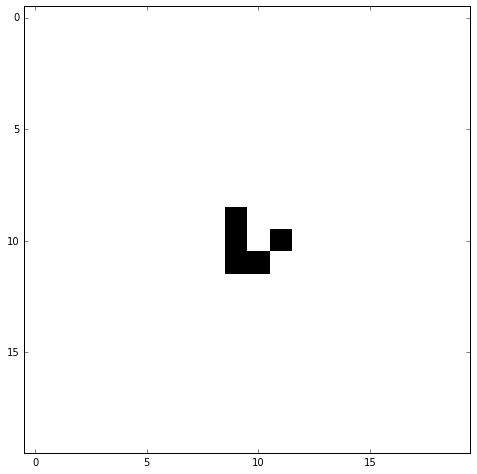

In [7]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

def get_state_image(state, boundaries=(-10, 10, -10, 10)):
    height = boundaries[1] - boundaries[0]
    width = boundaries[3] - boundaries[2]
    grid = np.zeros((height, width), dtype=int)
    for (i, j) in state:
        if i < boundaries[0] or i > boundaries[1]:
            continue
        if j < boundaries[2] or j > boundaries[3]:
            continue
        grid[i - boundaries[0], j - boundaries[2]] = 1
    return grid

plt.imshow(
    get_state_image(seed),
    cmap='Greys', interpolation='nearest'
);

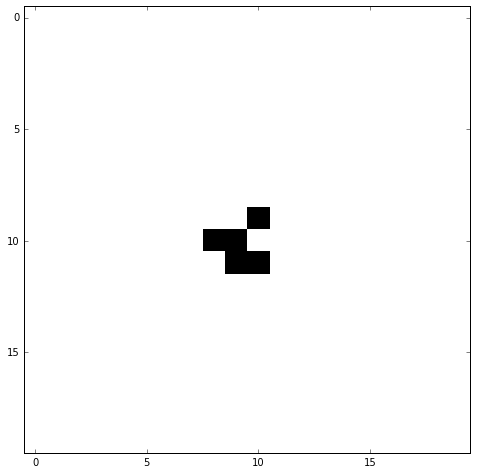

In [8]:
plt.imshow(
    get_state_image(live(seed)),
    cmap='Greys', interpolation='nearest'
);